In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 10.9 MB/s et

In [2]:
# Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pycaret import classification
from pycaret.classification import *

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
# Check for missing values in the training set
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#  pycaret classification init setup

s = setup(train_df, target = 'Survived', session_id = 100)

,Description,Value
0,Session id,100
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


In [6]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8090,0.8598,0.6904,0.7880,0.7331,0.5859,0.5915,0.7600
ridge,Ridge Classifier,0.8075,0.0000,0.6736,0.7958,0.7257,0.5797,0.5876,0.2100
rf,Random Forest Classifier,0.8074,0.8626,0.7065,0.7734,0.7351,0.5847,0.5892,0.5630
gbc,Gradient Boosting Classifier,0.8042,0.8477,0.6904,0.7808,0.7272,0.5761,0.5835,0.3890
catboost,CatBoost Classifier,0.8041,0.8588,0.6902,0.7790,0.7284,0.5765,0.5822,1.5490
et,Extra Trees Classifier,0.8009,0.8516,0.6984,0.7685,0.7264,0.5711,0.5774,0.5460
lda,Linear Discriminant Analysis,0.7994,0.8559,0.6821,0.7718,0.7205,0.5656,0.5714,0.2360
lightgbm,Light Gradient Boosting Machine,0.7850,0.8372,0.6737,0.7471,0.7026,0.5359,0.5423,0.3820
ada,Ada Boost Classifier,0.7818,0.8293,0.6779,0.7400,0.7015,0.5309,0.5375,0.3520
xgboost,Extreme Gradient Boosting,0.7674,0.8291,0.6819,0.7045,0.6892,0.5040,0.5075,0.5190


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

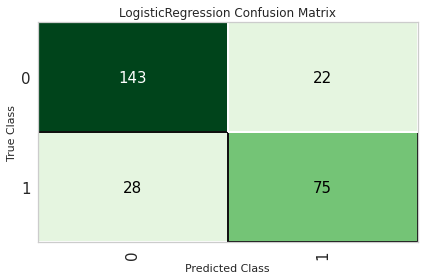

In [7]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

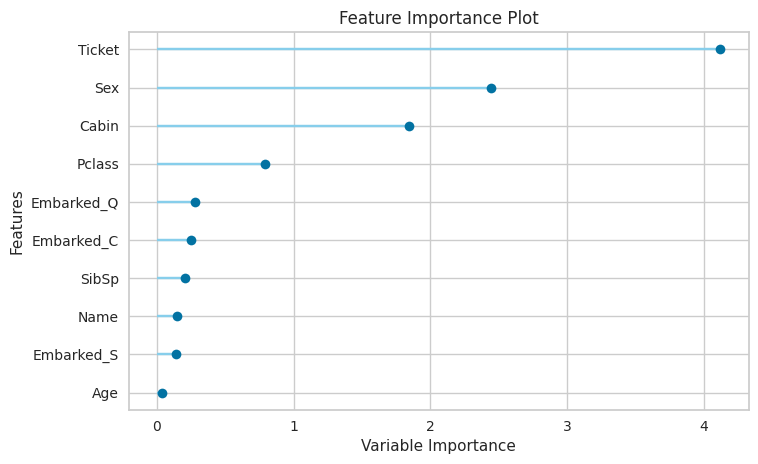

In [8]:
# plot feature importance
plot_model(best, plot = 'feature')

In [9]:
# Evaluate Model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8134,0.8769,0.7282,0.7732,0.7500,0.6014,0.6021


In [11]:
# show predictions df
holdout_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
338,339,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.05,NaN,S,1,0,0.9326
217,218,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.00,NaN,S,0,0,0.8782
363,364,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.05,NaN,S,0,0,0.9071
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.00,NaN,S,0,0,0.7991
144,145,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.50,NaN,S,0,0,0.7193


In [12]:
# predict model on test dataset
predictions = predict_model(best, data = test_df)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8529
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.5928
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8715
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8727
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.6129


In [13]:
# Save the predictions
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions['prediction_label']})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_01.csv', index=False)
print("Your submission was successfully saved!")